# Linear Regression

## Peer-graded Assignment

**=================================================================================================================**

## Project Description

When you’re scrolling through your favorite e-commerce site or app, you might find you spend more time on the site than you originally expected. E-commerce giants know the longer that you’re on the site or the app, the more likely you are to spend more and more on their products. But how can they maximize their profits by targeting the right customer? The answer lies in the data. 

Imagine you’ve been hired as a data science contractor by an e-commerce company, who is trying to decide whether to focus their efforts on their mobile app experience or their website. To provide the company with expert advice, you can run a linear regression model to provide you with a data-driven answer to the problem of which customers to target.

**=================================================================================================================**

## Import Libraries

In [1]:
import numpy as np
from numpy import count_nonzero, median, mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random



import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
# Import variance_inflation_factor from statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Import Tukey's HSD function
from statsmodels.stats.multicomp import pairwise_tukeyhsd

import datetime
from datetime import datetime, timedelta, date

# import shap
# import eli5
# from IPython.display import display

#import os
#import zipfile
import scipy
from scipy import stats
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test
from scipy.stats import boxcox
from collections import Counter

import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures

from sklearn.model_selection import cross_val_score, train_test_split, cross_validate, GridSearchCV
from sklearn.model_selection import KFold, cross_val_predict, RandomizedSearchCV, StratifiedShuffleSplit

from sklearn.metrics import accuracy_score, auc, classification_report, confusion_matrix, f1_score
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, precision_score, recall_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.feature_selection import f_regression, f_classif, chi2, RFE, RFECV
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif
from sklearn.feature_selection import VarianceThreshold, GenericUnivariateSelect
from sklearn.feature_selection import SelectFromModel, SelectKBest, SelectPercentile

from sklearn.inspection import permutation_importance

from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, LogisticRegression, Ridge


import feature_engine

from feature_engine.selection import (DropConstantFeatures, DropDuplicateFeatures, 
                                      DropCorrelatedFeatures, SmartCorrelatedSelection)
from feature_engine.selection import SelectBySingleFeaturePerformance, SelectByShuffling, RecursiveFeatureElimination
from feature_engine.selection import RecursiveFeatureAddition

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

# This module lets us save our models once we fit them.
# import pickle

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


**=================================================================================================================**

## Quick Data Glance

In [2]:
df = pd.read_csv("ecommercecust.csv")

In [3]:
df.head()

,email,address,avatar,avgsessionlength,timeonapp,timeonwebsite,lengthofmembership,yearlyamountspent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.50,12.66,39.58,4.08,587.95
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.93,11.11,37.27,2.66,392.20
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.00,11.33,37.11,4.10,487.55
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.31,13.72,36.72,3.12,581.85
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.33,12.80,37.54,4.45,599.41


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   email               500 non-null    object 
 1   address             500 non-null    object 
 2   avatar              500 non-null    object 
 3   avgsessionlength    500 non-null    float64
 4   timeonapp           500 non-null    float64
 5   timeonwebsite       500 non-null    float64
 6   lengthofmembership  500 non-null    float64
 7   yearlyamountspent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
df.dtypes.value_counts()

float64    5
object     3
dtype: int64

In [6]:
# Descriptive Statistical Analysis
df.describe(include="all")

,email,address,avatar,avgsessionlength,timeonapp,timeonwebsite,lengthofmembership,yearlyamountspent
count,500,500,500,500.00,500.00,500.00,500.00,500.00
unique,500,500,138,NaN,NaN,NaN,NaN,NaN
top,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",SlateBlue,NaN,NaN,NaN,NaN,NaN
freq,1,1,7,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,33.05,12.05,37.06,3.53,499.31
std,NaN,NaN,NaN,0.99,0.99,1.01,1.00,79.31
min,NaN,NaN,NaN,29.53,8.51,33.91,0.27,256.67
25%,NaN,NaN,NaN,32.34,11.39,36.35,2.93,445.04
50%,NaN,NaN,NaN,33.08,11.98,37.07,3.53,498.89
75%,NaN,NaN,NaN,33.71,12.75,37.72,4.13,549.31


In [7]:
# Descriptive Statistical Analysis
df.describe(include=["int", "float"])

,avgsessionlength,timeonapp,timeonwebsite,lengthofmembership,yearlyamountspent
count,500.00,500.00,500.00,500.00,500.00
mean,33.05,12.05,37.06,3.53,499.31
std,0.99,0.99,1.01,1.00,79.31
min,29.53,8.51,33.91,0.27,256.67
25%,32.34,11.39,36.35,2.93,445.04
50%,33.08,11.98,37.07,3.53,498.89
75%,33.71,12.75,37.72,4.13,549.31
max,36.14,15.13,40.01,6.92,765.52


In [8]:
# Descriptive Statistical Analysis
df.describe(include="object")

,email,address,avatar
count,500,500,500
unique,500,500,138
top,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",SlateBlue
freq,1,1,7


In [9]:
df.shape

(500, 8)

In [10]:
df.columns

Index(['email', 'address', 'avatar', 'avgsessionlength', 'timeonapp', 'timeonwebsite', 'lengthofmembership', 'yearlyamountspent'], dtype='object')

**=================================================================================================================**

In [11]:
df.drop(['email', 'address', 'avatar'], axis=1, inplace=True)

In [12]:
df.head()

,avgsessionlength,timeonapp,timeonwebsite,lengthofmembership,yearlyamountspent
0,34.50,12.66,39.58,4.08,587.95
1,31.93,11.11,37.27,2.66,392.20
2,33.00,11.33,37.11,4.10,487.55
3,34.31,13.72,36.72,3.12,581.85
4,33.33,12.80,37.54,4.45,599.41


**=================================================================================================================**

## Data Visualization

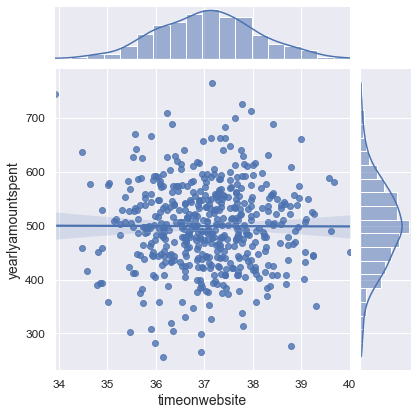

In [13]:
sns.jointplot(x=df.timeonwebsite, y=df.yearlyamountspent, kind='reg')
plt.show()

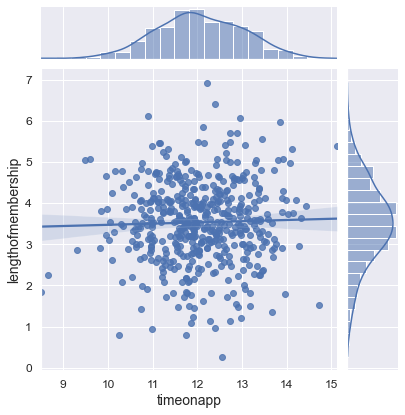

In [14]:
sns.jointplot(x=df.timeonapp, y=df.lengthofmembership, kind='reg')
plt.show()

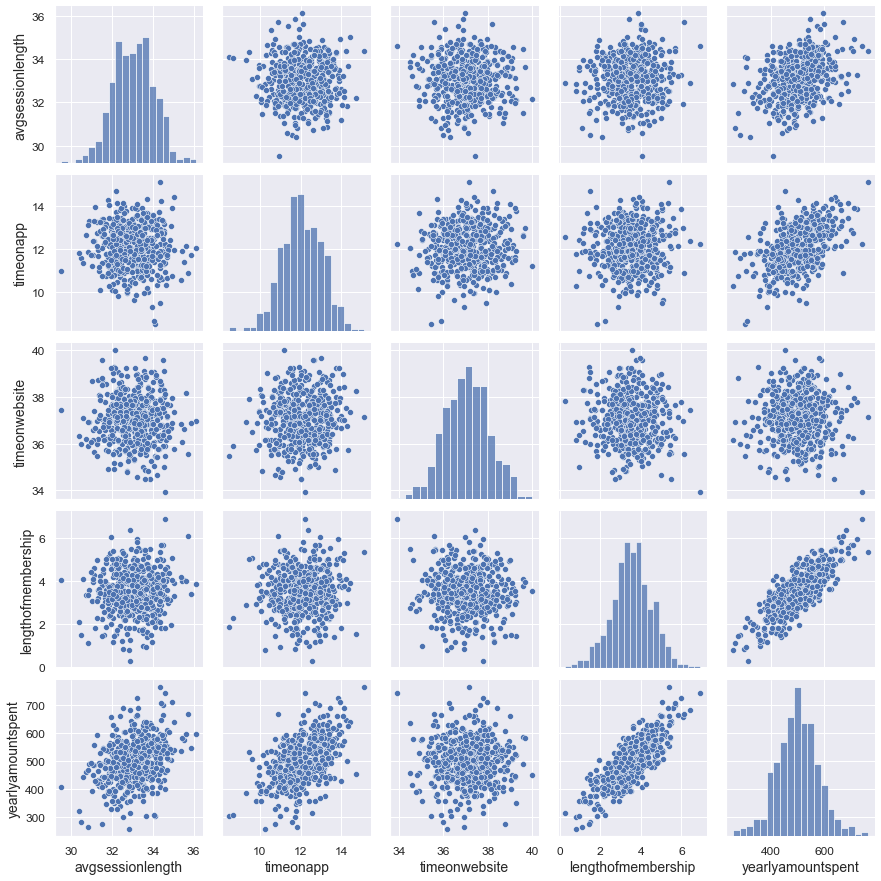

In [15]:
sns.pairplot(df)
plt.show()

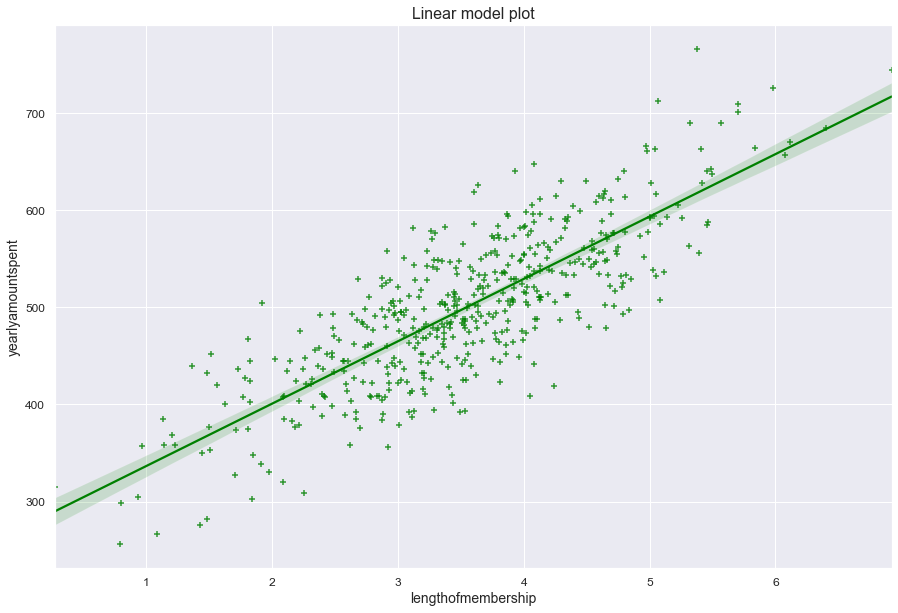

In [16]:
plt.figure(figsize=(15, 10))
sns.regplot(x='lengthofmembership', y='yearlyamountspent', data=df, color='green', marker='+')
plt.title("Linear model plot", size=16)
plt.show()

**=================================================================================================================**

##  Linear Regression 

Let's first understand what exactly `Regression` means it is a statistical method used in finance, investing, and other disciplines that attempts to determine the `strength` and `character` of the relationship between one `dependent variable` (usually denoted by `Y`) and a series of other variables known as `independent variables`.   
`Linear Regression` is a statistical technique where based on a set of `independent variable(s)` a dependent variable is `predicted`. 

$$\huge y_{i} =\beta _{0} + \beta _{1} X_{i} + \varepsilon_{i}$$

y = dependent variable     
$ \beta_{0}$ = population of intercept    
$ \beta_{i}$ = population of co-efficient   
x = independent variable    
$ \varepsilon_{i}$ = Random error   


**=================================================================================================================**

# Multiple Linear Regression 
It(as the name suggests) is characterized by `multiple independent variables` (more than `1`). While you discover the simplest `fit line`, you'll be able to adjust a `polynomial or regression` toward the `mean`. And these are called `polynomial or regression` toward the `mean`.

In [17]:
corrmat = df.corr()
corrmat

,avgsessionlength,timeonapp,timeonwebsite,lengthofmembership,yearlyamountspent
avgsessionlength,1.00,-0.03,-0.03,0.06,0.36
timeonapp,-0.03,1.00,0.08,0.03,0.50
timeonwebsite,-0.03,0.08,1.00,-0.05,-0.00
lengthofmembership,0.06,0.03,-0.05,1.00,0.81
yearlyamountspent,0.36,0.50,-0.00,0.81,1.00


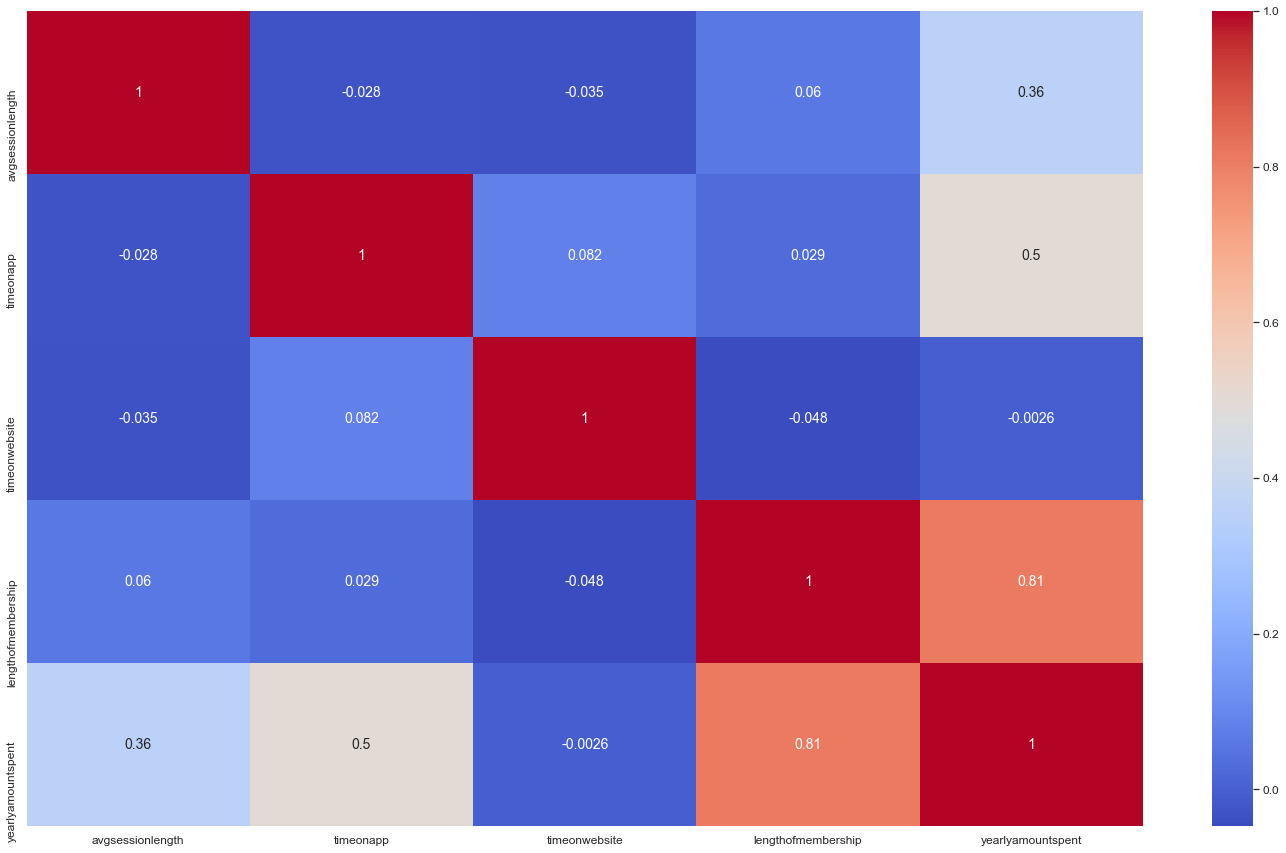

In [18]:
plt.subplots(figsize=(25,15))
sns.heatmap(corrmat, annot=True, annot_kws= {'size':14 }, cmap="coolwarm")
plt.show()

**=================================================================================================================**

## Multiple Linear Regression (Scikit Learn)

<p>What if we want to predict car price using more than one variable?</p>

<p>If we want to use more variables in our model to predict car price, we can use <b>Multiple Linear Regression</b>.
Multiple Linear Regression is very similar to Simple Linear Regression, but this method is used to explain the relationship between one continuous response (dependent) variable and <b>two or more</b> predictor (independent) variables.
Most of the real-world regression models involve multiple predictors. We will illustrate the structure by using four predictor variables, but these results can generalize to any integer:</p>

$$
Y: Response \ Variable\\\\\\\\\\
X\_1 :Predictor\ Variable \ 1\\\\
X\_2: Predictor\ Variable \ 2\\\\
X\_3: Predictor\ Variable \ 3\\\\
X\_4: Predictor\ Variable \ 4\\\\
$$


$$
a: intercept\\\\\\\\\\
b\_1 :coefficients \ of\ Variable \ 1\\\\
b\_2: coefficients \ of\ Variable \ 2\\\\
b\_3: coefficients \ of\ Variable \ 3\\\\
b\_4: coefficients \ of\ Variable \ 4\\\\
$$

The equation is given by:

$$
Yhat = a + b\_1 X\_1 + b\_2 X\_2 + b\_3 X\_3 + b\_4 X\_4
$$


### Train Test Split

We've prepared our data and we're ready to model. There's one last step before we can begin. We must split the data into features and target variable, and into training data and test data. We do this using the `train_test_split()` function. We'll put 25% of the data into our test set, and use the remaining 75% to train the model.

Notice below that we include the argument `stratify=y`. If our master data has a class split of 80/20, stratifying ensures that this proportion is maintained in both the training and test data. `=y` tells the function that it should use the class ratio found in the `y` variable (our target).

The less data you have overall, and the greater your class imbalance, the more important it is to stratify when you split the data. If we didn’t stratify, then the function would split the data randomly, and we could get an unlucky split that doesn’t get any of the minority class in the test data, which means we wouldn’t be able to effectively evaluate our model. Worst of all, we might not even realize what went wrong without doing some detective work.

Lastly, we set a random seed so we and others can reproduce our work.



In [19]:
df.shape

(500, 5)

In [20]:
df.head()

,avgsessionlength,timeonapp,timeonwebsite,lengthofmembership,yearlyamountspent
0,34.50,12.66,39.58,4.08,587.95
1,31.93,11.11,37.27,2.66,392.20
2,33.00,11.33,37.11,4.10,487.55
3,34.31,13.72,36.72,3.12,581.85
4,33.33,12.80,37.54,4.45,599.41


In [21]:
X = df.iloc[:,0:4]
y = df.iloc[:,4]

In [22]:
X.values, y.values

(array([[34.49726773, 12.65565115, 39.57766802,  4.08262063],
        [31.92627203, 11.10946073, 37.26895887,  2.66403418],
        [33.00091476, 11.33027806, 37.11059744,  4.1045432 ],
        ...,
        [32.64677668, 11.49940906, 38.33257633,  4.95826447],
        [33.32250105, 12.39142299, 36.84008573,  2.33648467],
        [33.71598092, 12.41880832, 35.77101619,  2.73515957]]),
 array([587.95105397, 392.20493344, 487.54750487, 581.85234404,
        599.40609205, 637.10244792, 521.57217476, 549.90414611,
        570.20040896, 427.1993849 , 492.60601272, 522.33740461,
        408.64035107, 573.41586733, 470.4527333 , 461.7807422 ,
        457.84769594, 407.70454755, 452.31567548, 605.0610388 ,
        534.70574381, 419.93877484, 436.51560573, 519.34098913,
        700.91709162, 423.17999168, 619.89563986, 486.83893477,
        529.53766534, 554.72208383, 497.5866713 , 447.68790654,
        588.71260551, 491.07322368, 507.44183234, 521.88357317,
        347.77692663, 490.73863214, 4

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 4), (100, 4), (400,), (100,))

### Linear Regression Model

In [25]:
lr = LinearRegression()

In [26]:
lr.fit(X_train,y_train)

LinearRegression()

In [27]:
lr_pred = lr.predict(X_test)
lr_pred[0:5]

array([438.46488066, 489.6618454 , 370.06954186, 513.8590556 ,
       495.69799868])

In [28]:
lr.intercept_

-1060.5508096198866

In [29]:
lr.coef_

array([25.88815047, 38.87046474,  0.47066154, 61.78369022])

### Linear Regression Evaluation

In [30]:
tablesmlr = pd.DataFrame(data={"Actual": y_test , "Predicted": lr_pred})
tablesmlr

,Actual,Predicted
90,449.07,438.46
254,482.60,489.66
283,374.27,370.07
445,513.15,513.86
461,502.77,495.70
...,...,...
372,385.15,383.74
56,520.90,524.17
440,499.14,500.68
60,616.85,606.79


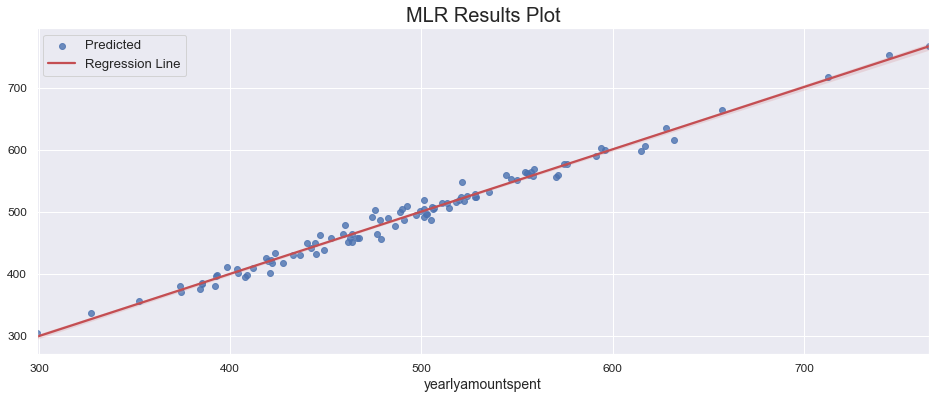

In [31]:
fig, ax = plt.subplots(figsize=(16,6))

sns.regplot(x=y_test, y=lr_pred, data=tablesmlr, line_kws={"color":"r"})
ax.set_title("MLR Results Plot", size=20)
ax.legend(['Predicted','Regression Line'])
plt.show()

In [32]:
mse = mean_squared_error(y_test,lr_pred)
mse

92.8901030449849

In [33]:
rmse = np.sqrt(mse)
rmse

9.637951185028118

In [34]:
r2score = r2_score(y_test,lr_pred)
r2score

0.9861924261981548

In [35]:
# Get the shape of x, to facilitate the creation of the Adjusted R^2 metric
X.shape

(500, 4)

In [36]:
# Number of observations is the shape along axis 0
n = X.shape[0]
# Number of features (predictors, p) is the shape along axis 1
p = X.shape[1]

In [37]:
# Number of observations is the shape along axis 0
n = X_train.shape[0]
# Number of features (predictors, p) is the shape along axis 1
p = X_train.shape[1]

In [38]:
# We find the Adjusted R-squared using the formula
adjusted_r2 = 1-(1-r2score)*(n-1)/(n-p-1)
adjusted_r2

0.9860526026659843

In [39]:
lr.score(X_train, y_train)

0.9837380400055443

In [40]:
lr.score(X_test, y_test)

0.9861924261981548

**=================================================================================================================**

### Provide a suggestion or advice to the company to focus on either website or app (based on the coefficient of the model) in a comment in your notebook

Mobile app has more influence on amount spent, therefore the company can focus on app development.

**=================================================================================================================**